### Word Cloud

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

!pip install wordcloud
from wordcloud import WordCloud
from nltk import FreqDist


In [15]:
ganjar = pd.read_csv('./Ganjar_Clean.csv')
prabowo = pd.read_csv('./Prabowo_Clean.csv')
anies = pd.read_csv('./Anies_Clean.csv')

In [16]:
ganjar.head()

,Unnamed: 0,full_text,label,clean_text
0,0,Dukung Ganjar Pranowo Sebagai Capres RI 2024 #...,1,dukung capres ri
1,1,@ch_chotimah2 @ganjarpranowo Ganjar capres ras...,0,capres ras mirip nazi anti israel
2,2,Ganjar Pranowo pemimpin yang kerja nyata untuk...,1,pimpin kerja nyata penting rakyat
3,3,Ganjar Pranowo pemimpin yang memiliki keberani...,1,pimpin milik berani nyali
4,4,Ganjar Pranowo pemimpin yang visioner dan cerd...,1,pimpin visioner cerdas


In [17]:
prabowo.head()

,Unnamed: 0,full_text,label,clean_text
0,0,@mirashahabudin @Mdy_Asmara1701 Indonesia butu...,1,indonesia butuh pimpin orang kharismatik pak m...
1,1,HUT PIRA Ke-15: Kader Perempuan Gerindra Meman...,1,hut pira kader perempuan gerindra panjat doa milu
2,2,@zyifals @DrPullmanrogers @Rasto66010876 @Akhm...,0,iya tunggu partai gurem tingkah rasa hebat nit...
3,3,@fadlizon @Gerindra @prabowo Makasih udah 2 x ...,0,terima kasih kali pilih beliau mohon maaf ubah...
4,4,@mirashahabudin @psi_id @erinagudono Iya... Sa...,1,iya moga kabar baik hari misal jadi maju terus...


In [18]:
anies.head()

,Unnamed: 0,full_text,label,clean_text
0,0,@lhayesno Maka itu pilih lah....Anies Baswedan...,1,pilih presiden nkri
1,1,Terimakasih anies baswedan.. Terima kasih Anie...,1,terimakasih terima kasih fisip ui ntuh buzzer ...
2,2,@sutanmangara InshaAllah Anies Baswedan PRESID...,1,inshaallah presiden ri h
3,3,@Yurissa_Samosir @bos_sir @Prakasa_AYP2 @Qianz...,1,bismillahirrahmanirrahim dukung jadi presiden ...
4,4,@aniesbaswedan @FISIP_UI @BEMFISIPUI @univ_ind...,1,pak lanjut level sabar buah pikir karya pak wu...


In [19]:
ganjar_text = " ".join(str(text) for text in ganjar['clean_text'] if not pd.isnull(text))

ganjar_text

'dukung capres ri capres ras mirip nazi anti israel pimpin kerja nyata penting rakyat pimpin milik berani nyali pimpin visioner cerdas bawa industri kreatif tryout the lanjut level pimpin beri teladan rakyat hormat ulama hina presiden jokowi rocky gerung jelek jelek bakal capres nyata negatif soal rocky gerung isi acara tajuk dialog akal sehat lombok timur nusa tenggara barat capres nyata prabayar pulsa capres rakyat turun lihat kondisi rakyat dengar keluh rakyat heran terima luas rakyat ian kasela mario dandy nikah supermoon refly harun rocky gerung malam ian ian ian jokowi tiktok karina nge kali bareskrim masyarakat kalang cinta pak capres terbail pilih rakyat ian kasela mario dandy nikah supermoon refly harun rocky gerung malam ian ian ian jokowi tiktok karina nge kali bareskrim pimpin beri teladan rakyat hormat ulama beri ruang musisi konten kreator kembang industri kreatif tanah air bantu peduli komitmen manfaat infrastruktur cepat ekonomi emak emak dukung jadi presiden tindak teg

In [20]:
prabowo_text = " ".join(str(text) for text in prabowo['clean_text'] if not pd.isnull(text))

prabowo_text

'indonesia butuh pimpin orang kharismatik pak mas gibran orang hebat positive hut pira kader perempuan gerindra panjat doa milu iya tunggu partai gurem tingkah rasa hebat nitizen ketawa arah anginya hasil manfaat nama jokowi muara capres tua iya penghianat nama terima kasih kali pilih beliau mohon maaf ubah pilih keluarga besar amin indonesia baik iya moga kabar baik hari misal jadi maju terus mas gibran damping pak pilpres all bismillah kirim coklat admin monggo bu siap dukung suka totalitas pak abdi nkri beliau milik harap hebat masa indonesia yuk gabung pilih khianat masuk kolam cebong moga anjing balas timpal optimus menang maju pasang mantap mas gibran cocok deklarasi cemman kalean rasa benar ngejebak pilih gibran logika fakta fahri dinasti pelan pelan pak sopir eh hati hati pak jebak main fahri pilih wakil nu ancam hilang suara nu min moga menang iya tahun tunggu banget bapak owo cinta menang presiden amin selamat pagi suara benar adil pandu ibu pertiwi mas punya hajat moral mint

In [21]:
anies_text = " ".join(str(text) for text in anies['clean_text'] if not pd.isnull(text))

anies_text

'pilih presiden nkri terimakasih terima kasih fisip ui ntuh buzzer kaleng golong intelektual punya wawas politik cocok jadi presiden terimakasih bond inshaallah presiden ri h bismillahirrahmanirrahim dukung jadi presiden indonesia pak lanjut level sabar buah pikir karya pak wujud adil sosial rakyat indonesia presiden insya allah salam ubah satu indonesia baik demokrat jaya pancasila abadi ahy presiden wakil ri cocok pak jadi presiden nkri periode tuju pak jadi presiden rtl politik bongkar alas jadi presiden moga bung pilih jadi presiden wuik politik bongkar alas jadi presiden seru jadi presiden buka lebar cuy moga pak jadi presiden indonesia tahun implementasi gagas pak pilih rakyat indonesia presiden ri tahun jusuf kalla dukung penuh jadi presiden ri dzolimi sparst ungkap juduf kalla merdeka kuasa tiongkok ubah indonesia pilih jadi presiden ri tahun penting presiden ri semangat terus ikhtiar menang insyaallah wujud jadi presiden ri amin janji timbul tenggelam lupa beliau masa wajah ba

In [26]:
ganjar_img = np.array(Image.open('./ganjar.png'))
ganjar_img

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[115, 104, 123, 255],
        [ 57,  48,  68, 255],
        [ 51,  46,  66, 255],
        ...,
        [ 81,  67,  87, 255],
        [165, 149, 163, 255],
        [232, 226, 229, 255]],

       [[ 87,  78,  99, 255],
        [ 54,  46,  68, 255],
        [ 53,  50,  71, 255],
        ...,
        [ 72,  56,  77, 255],
        [148, 129, 145, 255],
        [226, 218, 223, 255]],

       [[ 67

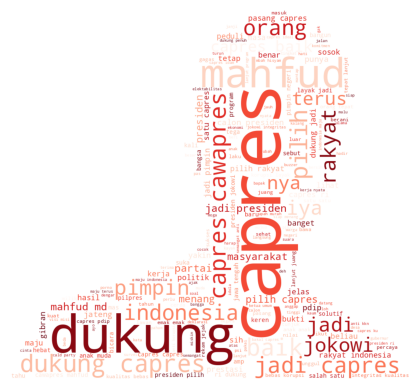

In [27]:
wc = WordCloud(background_color='white', mask = ganjar_img, stopwords=['pak'], colormap = 'Reds_r', width = 1920, height = 1080).generate(ganjar_text)
plt.axis("off")
plt.imshow(wc)

In [31]:
prabowo_img = np.array(Image.open('./prabowo.png'))
prabowo_img

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [248, 240, 232, 255],
        [244, 241, 238, 255],
        [248, 246, 244, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [247, 239, 231, 255],
        [244, 241, 237, 255],
        [248, 246, 244, 255]],

       [[255

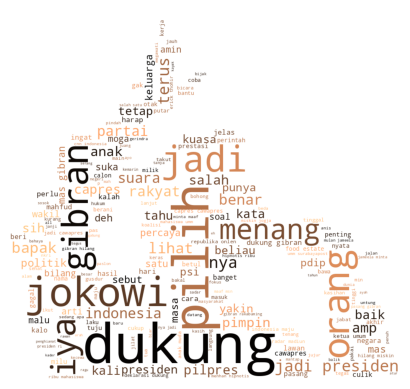

In [32]:
wc = WordCloud(background_color='white', mask = prabowo_img, stopwords=['pak'], contour_width = 2, contour_color = '#FFFFFF', colormap = 'copper', width=800, height=400).generate(prabowo_text)
plt.axis("off")
plt.imshow(wc)

In [33]:
anies_img = np.array(Image.open('./anies.png'))
anies_img

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [ 41,  39,  40, 255],
        [ 45,  44,  44, 255],
        [ 50,  49,  47, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [ 42,  40,  41, 255],
        [ 45,  43,  43, 255],
        [ 48,  47,  46, 255]],

       [[255

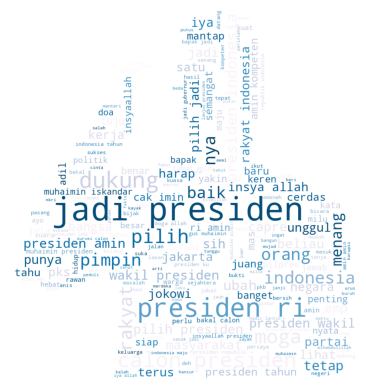

In [34]:
wc = WordCloud(background_color='white', mask = anies_img, stopwords=['pak'], colormap = 'PuBu', width = 800, height = 500).generate(anies_text)
plt.axis("off")
plt.imshow(wc)

## Label Distribution

In [38]:
clean = pd.read_csv('df_clean1.csv')

In [39]:
clean.head()

,Unnamed: 0,full_text,label,clean_text
0,0,Dukung Ganjar Pranowo Sebagai Capres RI 2024 #...,1,dukung capres ri
1,1,@ch_chotimah2 @ganjarpranowo Ganjar capres ras...,0,capres ras mirip nazi anti israel
2,2,Ganjar Pranowo pemimpin yang kerja nyata untuk...,1,pimpin kerja nyata penting rakyat
3,3,Ganjar Pranowo pemimpin yang memiliki keberani...,1,pimpin milik berani nyali
4,4,Ganjar Pranowo pemimpin yang visioner dan cerd...,1,pimpin visioner cerdas


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

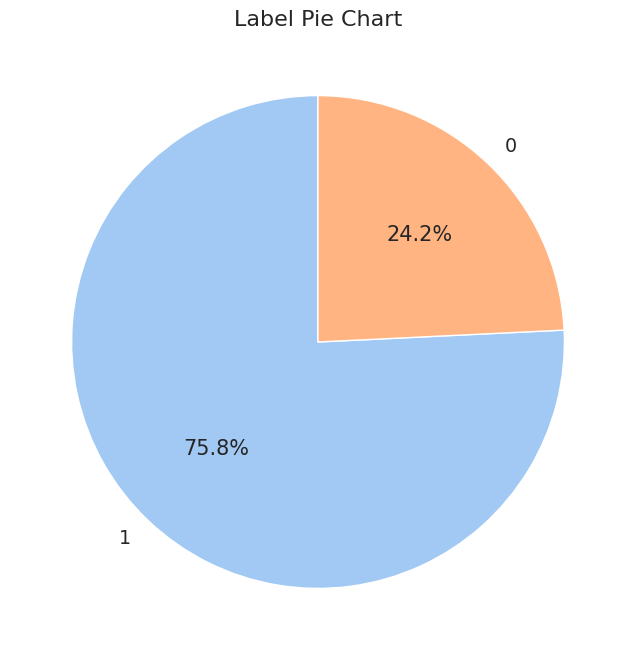

In [41]:
label_counts = clean['label'].value_counts()

sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.25)

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Label Pie Chart', fontsize=16)
plt.show()

## Distribution of Text Length

In [45]:
# Add a check for missing values before calculating the length
clean['text_length'] = clean['clean_text'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Display descriptive statistics
print(clean.describe())

        Unnamed: 0        label  text_length
count  4057.000000  4057.000000  4057.000000
mean   2550.131131     0.757703    68.035494
std    1412.364932     0.428526    44.356418
min       0.000000     0.000000     0.000000
25%    1348.000000     1.000000    33.000000
50%    2567.000000     1.000000    55.000000
75%    3717.000000     1.000000    96.000000
max    5023.000000     1.000000   248.000000


Text Length with Maximum Frequency: 40
Maximum Frequency: 63


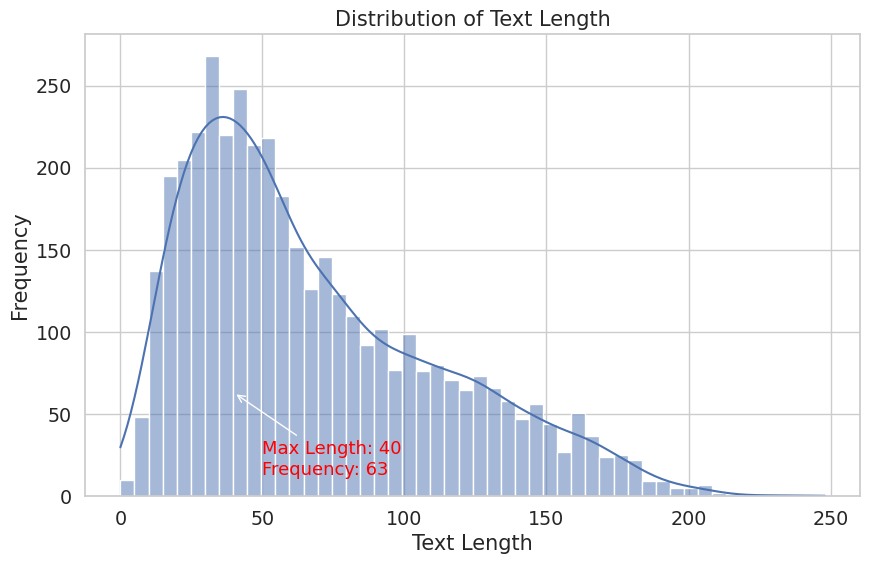

In [46]:
# Find the text length with the maximum frequency
max_length = clean['text_length'].value_counts().idxmax()

# Calculate the maximum frequency
max_frequency = clean['text_length'].value_counts().max()

# Display the maximum text length and its frequency
print("Text Length with Maximum Frequency:", max_length)
print("Maximum Frequency:", max_frequency)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(clean['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Annotate the plot with the maximum text length and its frequency
plt.annotate(f'Max Length: {max_length}\nFrequency: {max_frequency}',
             xy=(max_length, max_frequency),
             xytext=(max_length + 10, max_frequency - 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=13, color='red')

plt.show()

## Top Word Frequency

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


presiden: 1727
jadi: 1277
capres: 1229
pak: 1186
dukung: 801
pilih: 619
indonesia: 585
rakyat: 427
orang: 347
baik: 329
ri: 328
pimpin: 323
calon: 323
jokowi: 304
amin: 282
nya: 276
iya: 263
menang: 261
partai: 221
moga: 210
mahfud: 208
gibran: 206
cawapres: 204
satu: 192
terus: 187
ubah: 169
tetap: 167
allah: 160
punya: 160
anak: 153


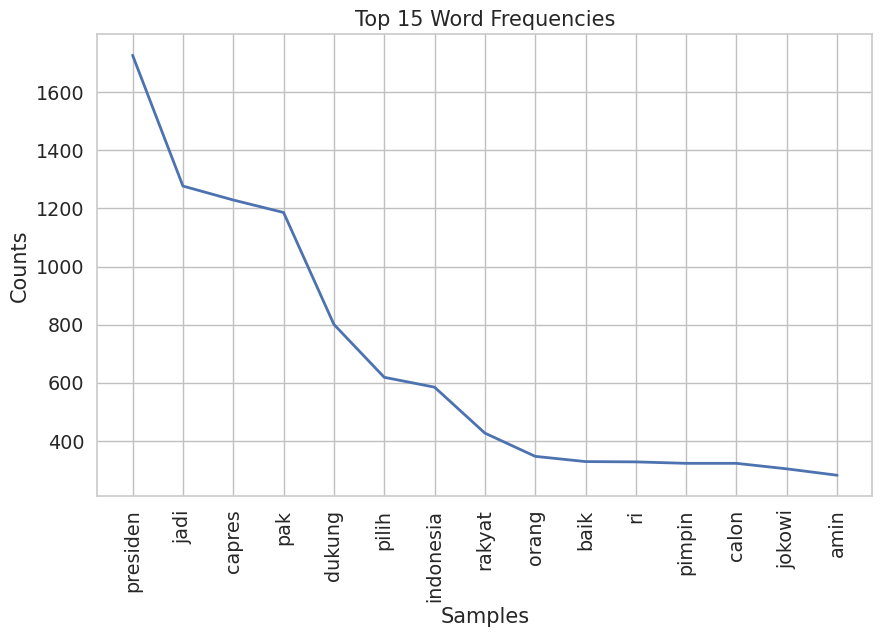

In [49]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Convert 'clean_text' column to strings and replace NaN values with empty strings
clean['clean_text'] = clean['clean_text'].astype(str).replace('nan', '')

# Tokenize the cleaned text
clean['tokens'] = clean['clean_text'].apply(word_tokenize)

# Flatten the list of tokens
all_tokens = [token for sublist in clean['tokens'] for token in sublist]

# Create a frequency distribution
freq_dist = FreqDist(all_tokens)

# Print the top 30 words and their frequencies
top_words = freq_dist.most_common(30)
for word, freq in top_words:
    print(f'{word}: {freq}')

# Plot the top 30 words
plt.figure(figsize=(10, 6))
plt.title('Top 15 Word Frequencies')
freq_dist.plot(15, cumulative=False)
plt.show()
